In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [2]:
images = pd.read_csv("Images.csv", sep=";", names=['image_id', 'class'])
edge_histogram = pd.read_csv("EdgeHistogram.csv", sep=";", names=['image_id']+['feature_'+str(i) for i in range(1,26)], skiprows=1, keep_default_na=False)


images = images['class']
images = images[1:]




In [3]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(edge_histogram.iloc[:,1:].values, images, test_size=0.2, random_state=42)


In [4]:
training_amounts = [3, 5, 10, 15]

In [5]:
#We will then create a loop to iterate over the different training amounts and
#perform the classification with the chosen classifier:
# Define the classifier
knn = KNeighborsClassifier(n_neighbors=11)
RANDOM_SEED = 42
accuracy_array=[]


# Loop over the different training amounts
for training_amount in training_amounts:
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(edge_histogram.iloc[:,1:].values, images, test_size=abs(1-training_amount/len(images[1])), random_state=42)
                                                  
    # Fit the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = knn.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_array.append(accuracy)
    # Print the results
    print("Training amount: ", training_amount)
    print("Accuracy: ", accuracy)
    print("----------------------------")
    
    #Checking performance our model with classification report.
    print(classification_report(y_test, y_pred))
    #Checking performance our model with ROC Score.
    #roc_auc_score(y_test, y_pred)

Training amount:  3
Accuracy:  0.3559127439724455
----------------------------


/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

                   precision    recall  f1-score   support

BACKGROUND_Google       0.11      0.21      0.14       307
            Faces       0.60      0.91      0.72       573
         Leopards       0.39      0.70      0.50       141
       Motorbikes       0.43      0.92      0.59       530
        accordion       0.37      0.33      0.35        33
        airplanes       0.58      0.90      0.70       547
           anchor       0.06      0.04      0.05        25
              ant       0.00      0.00      0.00        28
           barrel       0.06      0.03      0.04        34
             bass       0.00      0.00      0.00        30
           beaver       0.04      0.03      0.04        31
        binocular       0.00      0.00      0.00        20
           bonsai       0.02      0.01      0.01        81
            brain       0.14      0.17      0.15        66
     brontosaurus       0.13      0.07      0.09        29
           buddha       0.04      0.02      0.03       

/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Training amount:  10
Accuracy:  0.4119960668633235
----------------------------
                   precision    recall  f1-score   support

BACKGROUND_Google       0.16      0.23      0.19        61
            Faces       0.70      0.89      0.78       101
         Leopards       0.41      0.70      0.52        23
       Motorbikes       0.58      0.91      0.71       118
        accordion       0.50      0.50      0.50         8
        airplanes       0.60      0.94      0.73        93
           anchor       0.33      0.25      0.29         4
              ant       0.00      0.00      0.00         6
           barrel       0.00      0.00      0.00         4
             bass       0.00      0.00      0.00         7
           beaver       0.00      0.00      0.00        11
        binocular       0.00      0.00      0.00         6
           bonsai       0.14      0.22      0.17         9
            brain       0.09      0.20      0.13         5
     brontosaurus       0.00      

/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

Training amount:  15
Accuracy:  0.3559127439724455
----------------------------
                   precision    recall  f1-score   support

BACKGROUND_Google       0.11      0.21      0.14       307
            Faces       0.60      0.91      0.72       573
         Leopards       0.39      0.70      0.50       141
       Motorbikes       0.43      0.92      0.59       530
        accordion       0.37      0.33      0.35        33
        airplanes       0.58      0.90      0.70       547
           anchor       0.06      0.04      0.05        25
              ant       0.00      0.00      0.00        28
           barrel       0.06      0.03      0.04        34
             bass       0.00      0.00      0.00        30
           beaver       0.04      0.03      0.04        31
        binocular       0.00      0.00      0.00        20
           bonsai       0.02      0.01      0.01        81
            brain       0.14      0.17      0.15        66
     brontosaurus       0.13      

/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [11]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train, y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

/Users/user/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Best leaf_size: 1
Best p: 2
Best n_neighbors: 11


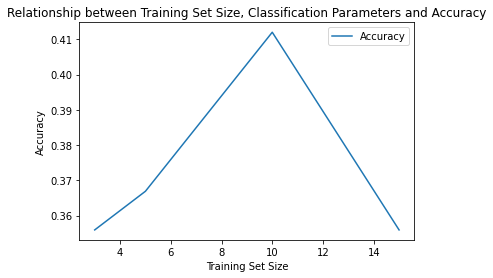

In [6]:
import matplotlib.pyplot as plt

train_size = [3, 5, 10, 15]
param1 = [0.1, 0.5, 1, 2]
param2 = [10, 50, 100, 200]
#accuracy = accuracy_array

plt.plot(train_size, accuracy_array, label='Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Relationship between Training Set Size, Classification Parameters and Accuracy')
plt.legend()
plt.show()

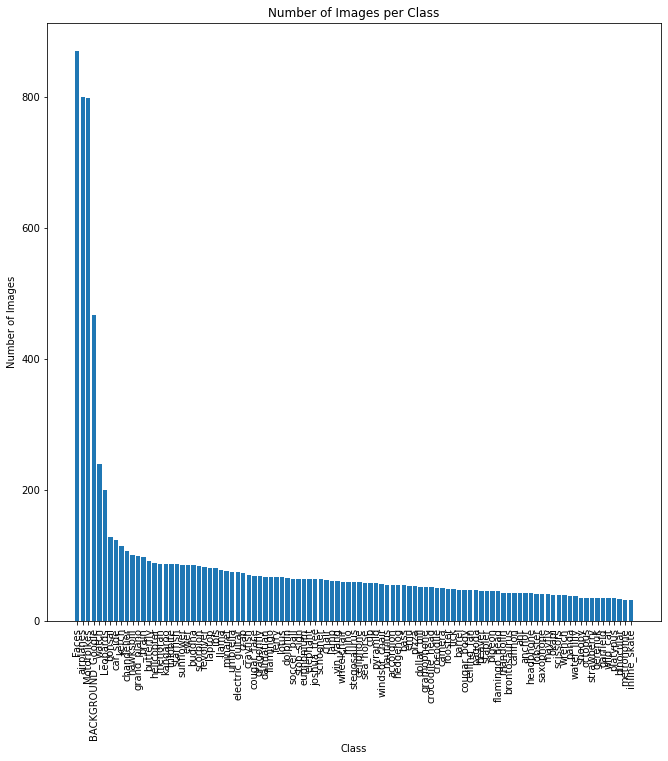

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the Images data
images = pd.read_csv('Images.csv', sep=';',names =['id','class'])

# Count the number of images per class
class_count = images['class'].value_counts()

# Plotting bar plot for number of images per class
plt.figure(figsize=(11, 11))
plt.bar(class_count.index, class_count.values)
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(rotation=90)
plt.show()
